In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')


## Importing data

In [4]:
df = pd.read_csv("data/HepatitisCdata.csv")

In [5]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [7]:
# making a copy of dataframe
hepatitis= df.copy()
hepatitis[:5]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
# Turning the category column to numeric values
hepatitis.replace("0=Blood Donor", 0, inplace=True)
hepatitis.replace("1=Hepatitis", 1, inplace=True)
hepatitis.replace("2=Fibrosis", 2, inplace=True)
hepatitis.replace("3=Cirrhosis", 3, inplace=True)
hepatitis.replace("0s=suspect Blood Donor", 4, inplace=True)
hepatitis

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [9]:
# checking missing values
hepatitis.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [10]:
# Find the colums which contain strings 

for label, content in hepatitis.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Sex


In [11]:
# This will turn all of the string value into category value 
for label, content in hepatitis.items():
    if pd.api.types.is_string_dtype(content):
        hepatitis[label] = content.astype("category").cat.as_ordered()

In [12]:
# checking numerical columns
for label, content in hepatitis.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Unnamed: 0
Category
Age
ALB
ALP
ALT
AST
BIL
CHE
CHOL
CREA
GGT
PROT


In [13]:
# Fill missing numerical columns with median 
for label, content in hepatitis.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # binary columns telling missing data
            hepatitis[label + "_is_missing"] = pd.isnull(content)
            # fill missing values with median
            hepatitis[label] = content.fillna(content.median())
        

In [14]:
# turn categorical variables into numeric 
for label,content in hepatitis.items():
    if not pd.api.types.is_numeric_dtype(content):
        # turning categories into number adding 1
        hepatitis[label] = pd.Categorical(content).codes +1

In [15]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       615 non-null    int64  
 1   Category         615 non-null    int64  
 2   Age              615 non-null    int64  
 3   Sex              615 non-null    int8   
 4   ALB              615 non-null    float64
 5   ALP              615 non-null    float64
 6   ALT              615 non-null    float64
 7   AST              615 non-null    float64
 8   BIL              615 non-null    float64
 9   CHE              615 non-null    float64
 10  CHOL             615 non-null    float64
 11  CREA             615 non-null    float64
 12  GGT              615 non-null    float64
 13  PROT             615 non-null    float64
 14  ALB_is_missing   615 non-null    bool   
 15  ALP_is_missing   615 non-null    bool   
 16  ALT_is_missing   615 non-null    bool   
 17  CHOL_is_missing 

In [17]:
hepatitis

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALB_is_missing,ALP_is_missing,ALT_is_missing,CHOL_is_missing,PROT_is_missing
0,1,0,32,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False,False,False,False,False
1,2,0,32,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False,False,False,False,False
2,3,0,32,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False,False,False,False,False
3,4,0,32,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False,False,False,False,False
4,5,0,32,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,False,False,False,False,False
611,612,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,False,False,False,False,False
612,613,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,False,False,False,False,False
613,614,3,46,1,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,False,True,False,False,False


In [18]:
# removing unwanted columns 
del hepatitis["ALB_is_missing"]
del hepatitis[ "ALP_is_missing"]
del hepatitis["ALT_is_missing"]
del hepatitis["CHOL_is_missing"]
del hepatitis["PROT_is_missing"]
del hepatitis["Unnamed: 0"]

In [21]:
# Spliting data into features(X) and label(y)
target = "Category"
X = hepatitis.drop(target, axis = 1)
y = hepatitis[target]

In [23]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 42, test_size=0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((492, 12), (123, 12), (492,), (123,))

 Comparing 3 different machine learning models for our data:
 1. logistic regression
 2. K-NearestNeigbour
 3. Random Forest Classifier

In [26]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier (),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score model 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    model : a dict different sklearn ml model
    X_train : trainig data (no labels)
    X_text : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    
    """
    # set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [29]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)


model_scores

{'Logistic Regression': 0.8617886178861789,
 'KNN': 0.8130081300813008,
 'Random Forest': 0.8617886178861789}

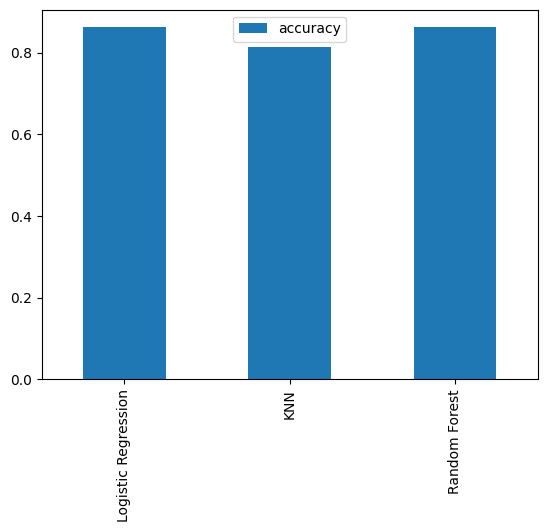

In [30]:
model_compare = pd.DataFrame(model_scores, index= ["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning with RandimizedSearchCV

In [31]:
# Create a hyperparameter grid for RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [32]:
#  Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True,
                          random_state=42)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=True)

In [33]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [34]:
rs_rf.score(X_test, y_test)

0.8536585365853658

In [35]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid ={"C": np.logspace(-4, 4, 20),
              "solver" : ["liblinear"]}

In [36]:
# setup random hyperparameter search for a LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True,
                               random_state= 42)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [37]:
rs_log_reg.score(X_test, y_test)

0.8699186991869918

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

## since logistics regression model gave the best score lets make focus more on tuning with best parameter and save model for prediction 

In [39]:
# Instantiating a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
hepatitis_model = LogisticRegression(solver = 'liblinear', C =  1.623776739188721)

# Fitting the new instance of LogisticRegression with the best hyperparameters on the training databest_para = {'solver': 'liblinear', 'C': 1.3738237958832638}
hepatitis_model.fit(X_train, y_train)
hepatitis_model.score(X_test, y_test)

0.8699186991869918

In [42]:
# Make predictions on test data 
y_preds = hepatitis_model.predict(X_test)
y_preds

array([0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       3, 4, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [43]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[95,  0,  0,  0,  1],
       [ 3,  3,  2,  0,  1],
       [ 4,  0,  2,  0,  0],
       [ 2,  0,  0,  5,  2],
       [ 1,  0,  0,  0,  2]], dtype=int64)

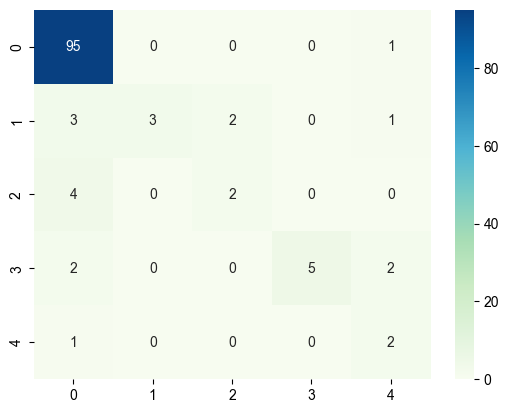

In [46]:
# Creating a more visual confusion matrix


sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='GnBu')
sns.set(font_scale=2)

In [47]:
# Classification Report 
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95        96
           1       1.00      0.33      0.50         9
           2       0.50      0.33      0.40         6
           3       1.00      0.56      0.71         9
           4       0.33      0.67      0.44         3

    accuracy                           0.87       123
   macro avg       0.75      0.58      0.60       123
weighted avg       0.89      0.87      0.86       123



In [58]:
pred_df = pd.DataFrame({"Actual Value": y_test,"Predicted Value":y_preds,":Difference":y_test-y_preds})
pred_df

,Actual Value,Predicted Value,:Difference
248,0,0,0
365,0,0,0
432,0,0,0
610,3,4,-1
132,0,0,0
...,...,...,...
281,0,0,0
291,0,0,0
250,0,0,0
11,0,0,0
